# Excercise-1

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cma

In [94]:
cap = cv2.VideoCapture('Robots.mp4')

In [89]:
ret, frame = cap.read()
print(ret)

True


In [78]:
ret, frame1 = cap.read()
print(ret)

True


In [90]:
cv2.imshow('image', frame)
cv2.waitKey(20)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to tar

-1

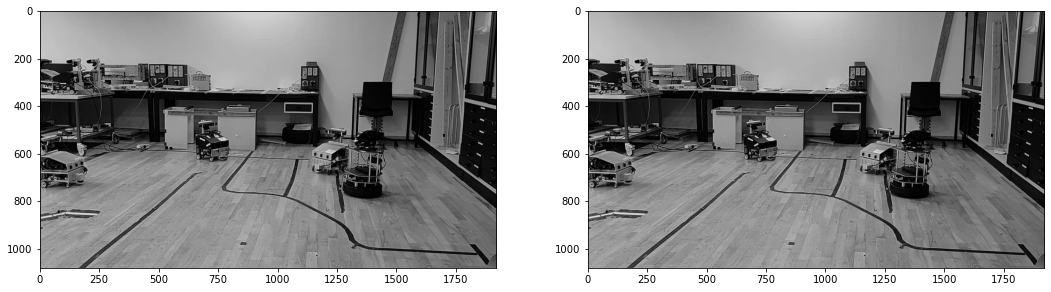

In [79]:
b,g,r = cv2.split(frame) # Changing the order from bgr to rgb so that matplotlib can show it
img1 = cv2.merge([r,g,b])
b,g,r = cv2.split(frame1) # Changing the order from bgr to rgb so that matplotlib can show it
img2 = cv2.merge([r,g,b])
img3 = img2.copy()

gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)

plt.figure(figsize = (18,18))
plt.subplot(1,2,1)
plt.imshow(gray1, cmap = 'gray')
plt.subplot(1,2,2)
plt.imshow(gray2, cmap = 'gray')

In [80]:
feat1 = cv2.goodFeaturesToTrack(gray1, maxCorners=100, qualityLevel=0.3, minDistance=7)
feat2, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, feat1, None)

In [75]:
print(len(feat1),len(feat2))

100 100


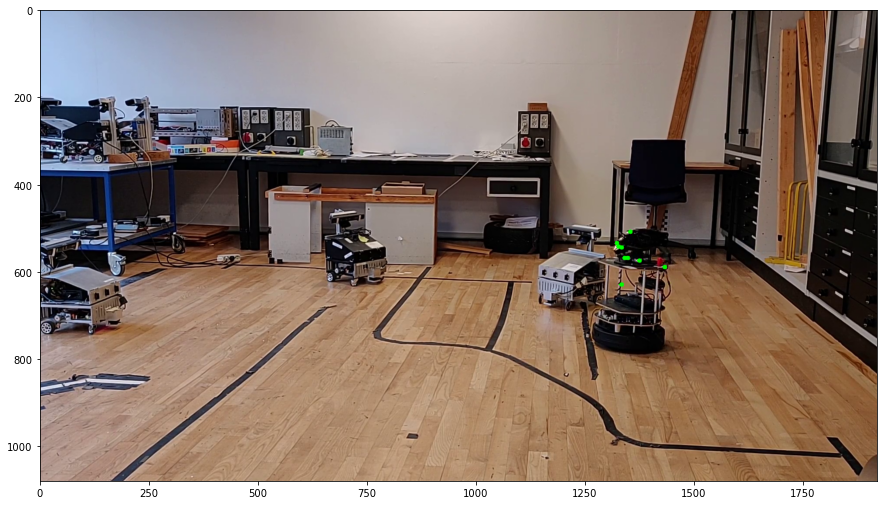

In [83]:
threshold = 3
img3 = img2.copy()
for i in range(len(feat1)):
    f10=int(feat1[i][0][0])
    f20=int(feat2[i][0][0])
    f11=int(feat1[i][0][1])
    f21=int(feat2[i][0][1])
    if ((f10-f20)**2 + (f11-f21)**2)**0.5 > threshold:
        cv2.line(img3, (f10,f11), (f20, f21), (0, 255, 0), 2)
        cv2.circle(img3, (f10, f11), 5, (0, 255, 0), -1)
    
plt.figure(figsize=(15,15))
plt.imshow(img3)

In [147]:
cap = cv2.VideoCapture('Robots.mp4')

In [107]:
while True:
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()
    if ret == False:
        break
    
    b,g,r = cv2.split(frame1) # Changing the order from bgr to rgb so that matplotlib can show it
    img1 = cv2.merge([r,g,b])
    b,g,r = cv2.split(frame2) # Changing the order from bgr to rgb so that matplotlib can show it
    img2 = cv2.merge([r,g,b])
    img3 = img2.copy()

    gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    
    feat1 = cv2.goodFeaturesToTrack(gray1, maxCorners=5000, qualityLevel=0.15, minDistance=3)
    feat2, status, error = cv2.calcOpticalFlowPyrLK(gray1, gray2, feat1, None) 
    
    threshold = 3
    img3 = img2.copy()
    for i in range(len(feat1)):
        f10=int(feat1[i][0][0])
        f20=int(feat2[i][0][0])
        f11=int(feat1[i][0][1])
        f21=int(feat2[i][0][1])
        if ((f10-f20)**2 + (f11-f21)**2)**0.5 > threshold:
            cv2.line(img3, (f10,f11), (f20, f21), (0, 255, 0), 2)
            cv2.circle(img3, (f10, f11), 5, (0, 255, 0), -1)
        
    cv2.imshow('image', img3)
    cv2.waitKey(20)

In [150]:
while True:
    ret, frame1 = cap.read()
    ret, frame2 = cap.read()
    if ret == False:
        break
    
    b,g,r = cv2.split(frame1) # Changing the order from bgr to rgb so that matplotlib can show it
    img1 = cv2.merge([r,g,b])
    b,g,r = cv2.split(frame2) # Changing the order from bgr to rgb so that matplotlib can show it
    img2 = cv2.merge([r,g,b])
    img3 = img2.copy()

    gray1 = cv2.cvtColor(img1, cv2.COLOR_RGB2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_RGB2GRAY)
    
    flow = cv2.calcOpticalFlowFarneback(gray1, gray2, None, 0.5, 3, 15, 3, 5, 1.5, 0)
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1]) # Retrieving the magnitude and angle of every pixel

    ### Fill in some code to represent the flow here ###
    hsv = np.zeros_like(img1)
    hsv[..., 1] = 255

    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
        
    cv2.imshow('image', cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))
    cv2.waitKey(20)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to target thread (0x55df91db2c10)

QObject::moveToThread: Current thread (0x55df91db2c10) is not the object's thread (0x55df9287e690).
Cannot move to tar

KeyboardInterrupt: 

In [153]:
ret, old_frame = cap.read()
while True:
    # Read the next frame
    ret, new_frame = cap.read()
    frame_copy = new_frame
    if not ret:
        break
    b,g,r = cv2.split(old_frame) # Changing the order from bgr to rgb so that matplotlib can show it
    img1 = cv2.merge([r,g,b])
    b,g,r = cv2.split(new_frame) # Changing the order from bgr to rgb so that matplotlib can show it
    img2 = cv2.merge([r,g,b])
    
    # Preprocessing for exact method
    img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calculate Optical Flow
    flow = cv2.calcOpticalFlowFarneback(img1, img2, None, 0.5, 3, 15, 3, 5, 1.5, 0)

    # Encoding: convert the algorithm's output into Polar coordinates
    mag, ang = cv2.cartToPolar(flow[:,:,0], flow[:,:,1])
    # Use Hue and Value to encode the Optical Flow
#    hsv = np.zeros_like(old_frame)
#    hsv[..., 1] = 255
    hsv[..., 0] = ang * 180 / np.pi / 2
    hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

    # Convert HSV image into BGR for demo
    bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
    #cv2.imshow("frame", frame_copy)
    cv2.imshow("optical flow" , cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR))
    cv2.waitKey(20)
    
   # k = cv2.waitKey(25) & 0xFF
   # if k == 27:
   #     break

    # Update the previous frame
    old_frame = new_frame

In [151]:
#cap.release()
cv2.destroyAllWindows()